## Practical5b

The goal of this part of the practical is to use the dynamic programming
routine that you developed in the first part to solve the dense stero problem.

Use the template below, filling in parts marked "TO DO".


In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np 
from scipy.io import loadmat
import matplotlib.pyplot as plt
import time
from functions import dynamicProgram, dynamicProgramVec
plt.close('all')

In [2]:
# load in images and ground truth
data = loadmat('StereoData.mat')
im1 = data['im1'].astype('int')
im2 = data['im2'].astype('int')
gt = data['gt'].astype('int')

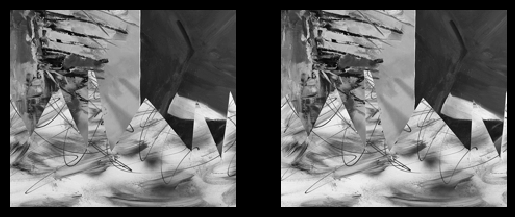

In [3]:
# ground truth disparity is originally expressed in 16'ths of pixels but we 
# will only consider whole-pixel shifts
gtDisp = np.round(gt.astype(float)/16)

im1show = im1
im2show = im2
if np.max(im1) > 1:
    im1show = im1.astype(float)/255.
    im2show = im2.astype(float)/255.
    
# display image
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(im1, cmap='gray', interpolation='nearest', aspect=1)
ax1.axis('off')
ax2.imshow(im2, cmap='gray', interpolation='nearest', aspect=1)
ax2.axis('off')
plt.show()

### Complete the TODOs in the final cell below

Here we are going to make use of the "dynamicProgram" function we just wrote.

We will first calculate the unary costs before using our function to calculate estimated disparity.

In [ ]:
# figure out size of image
imY = len(im1)
imX = len(im1[0])

# define maximum disparity 
maxDisp = 10

# set up pairwiseCosts - we will define a fixed cost of alpha for changing
# disparity or zero cost for staying the same
alpha = 1
pairwiseCosts = alpha*np.ones([maxDisp,maxDisp])-alpha*np.eye(maxDisp)

# initialize the disparity map that we will estimate
estDisp = np.zeros([imY,imX-maxDisp])

# define standard deviation of noise
noiseSD = 6

# display ground truth and estimated disparity
plt.close('all')
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(gtDisp, vmin=0,vmax=11, cmap='gray', extent=[0,len(gtDisp[0]),0,len(gtDisp)],interpolation='nearest')
ax1.axis('off')
ax1.set_title('Ground Truth')
ax2.axis('off')
plt.show()

# run through each line of image
for cY in range(imY):
    print('Procesing scanline ',cY)
    
    # define unary costs - we will not use the last few columns of the
    # image as the disparity might map the pixel outside the valid area of
    # the second image
    unaryCosts = np.zeros([maxDisp,imX-maxDisp])
    
    for cDisp in range(maxDisp):
        cost=np.zeros(imX-maxDisp)
        for cX in range(imX-maxDisp):
            pass
            #TODO - calculate cost for this disparity. This is the 
            #negative log likelihood, where the likelihood is a Gaussian
            #with a mean of the value (i.e. intensity) at the offset pixel 
            #in image2 and a standard deviation of "noiseSD". 
            cost[cX] = 0
        
        # TODO store this cost in the unaryCosts matrix
        # unaryCosts[ , ] = ...
            
    # TODO uncomment the line below and call the function that you wrote in the previous section (copy it
    # into the cell above)
    
    # estDisp[cY,:] = np.transpose(dynamicProgram(unaryCosts,pairwiseCosts))

    # display solution so far
    f, (ax1, ax2) = plt.subplots(1, 2)
    #ax1.clear()
    ax1.imshow(gtDisp, vmin=0,vmax=11, cmap='gray', extent=[0,len(gtDisp[0]),0,len(gtDisp)],interpolation='nearest')
    ax1.axis('off')
    ax1.set_title('Ground Truth')
    #ax2.clear()
    ax2.imshow(estDisp, vmin=0,vmax=12, cmap='gray', extent=[0,len(estDisp[0]),0,len(estDisp)],interpolation='nearest')
    ax2.axis('off')
    ax2.set_title('Estimated Disparity')
    plt.show()
    
    
    
# TODO - investigate how different values of alpha and noiseSD affect the results

# TODO (optional) - rewrite the the "dynamicProgram" in the "dynamicProgramVec" function to make it more efficient. 
# Check the improvements by timining the function calls.

# TODO (optional) - you should be able to rewrite this (calculating unary costs) with fewer loops once you have
#the general idea so that it runs faster. Again you can check the speed improvements by timing them.

# TODO (optional)- adapt the algorithm so that it makes use of colour information